# Problem Set 3: Logistic Regression

# Exercise 1

Consider the following binary model
$P(Y_{i} = y_{i}) = \pi_{i}^{y_{i}}*(1-\pi_{i})^{1-y_{i}}, y_{i} \in \{0, 1\}$   
where  
$\pi_{i}(x_{i}, \beta) = \frac{e^{x'_{i}\beta}}{(1 + e^{x'_{i}\beta})} = \frac{1}{1+e^{-x'_{i}\beta}}$

1. Simulate this model with the probabilities as described above with the following values:

- $n =1000$
- $\beta_0=-2, \, \beta_1=0.1,\, \, \, \beta_2=1$.
- $x_{0i}=1 \, \forall \,i$ , $x_{1i}\sim \mathcal{U}(18,60), \, x_{2i}\sim \mathcal{B}(0.5)$. 

2. Estimate $\beta_0, \, \beta_1,\, \beta_2$ via maximum likelihood and calculate the standard errors.

$P(Y_{i} = 1) = \pi_{i}^{1}*(1-\pi_{i})^{1-1} = \pi_{i}$  
$\log(\frac{\pi_{i}}{1 - \pi_{i}}) = x'_{i}\beta$

In [1]:
# Load necessary libraries
pacman::p_load(ggplot2, tidyverse, MASS, caret, ggpubr)

In [2]:
# Set.seed()
seed <- 40
set.seed(seed)

In [3]:
# Parameters
n <- 1000
beta <- c(-2, 0.1, 1)
X1.min <- 18
X1.max <- 60
X2.P1 <- 0.5


In [4]:
# Define Data Gnerating function
data.gen <- function(n, beta, X1.min, X1.max, X2.P1) {
  X0 <- rep(1, n)
  X1 <- runif(n, X1.min, X1.max)
  X2 <- rbinom(n, 1, X2.P1)
  X <- cbind(X0, X1, X2)
  y <- rep(0, n)
  pi_x <- 1 / (1 + exp(-(X %*% beta)))
  y <- rbinom(n, 1, prob = pi_x)
  data <- cbind.data.frame(X, y)
  return(data)
}


## a) Generate the data

In [5]:
# a)
# Generate the training data
data.train <- data.gen(n, beta, X1.min, X1.max, X2.P1)
head(data.train)

X.train <- cbind(data.train$X0, data.train$X1, data.train$X2)
head(X.train)

# Generate the test data
data.test <- data.gen(n, beta, X1.min, X1.max, X2.P1) 
head(data.test)

X.test <- cbind(data.test$X0, data.test$X1, data.test$X2)
head(X.test)

,X0,X1,X2,y
,<dbl>,<dbl>,<dbl>,<int>
1,1,46.71044,1,1
2,1,54.66196,1,1
3,1,46.98493,1,1
4,1,22.86932,0,1
5,1,26.19038,0,0
6,1,37.37044,1,1


1,46.71044,1
1,54.66196,1
1,46.98493,1
1,22.86932,0
1,26.19038,0
1,37.37044,1


,X0,X1,X2,y
,<dbl>,<dbl>,<dbl>,<int>
1,1,44.27134,1,1
2,1,22.06951,0,0
3,1,39.49629,1,1
4,1,43.63688,1,1
5,1,54.45007,1,1
6,1,48.14191,1,1


1,44.27134,1
1,22.06951,0
1,39.49629,1
1,43.63688,1
1,54.45007,1
1,48.14191,1


In [6]:
table(data.train$y)


  0   1 
128 872 

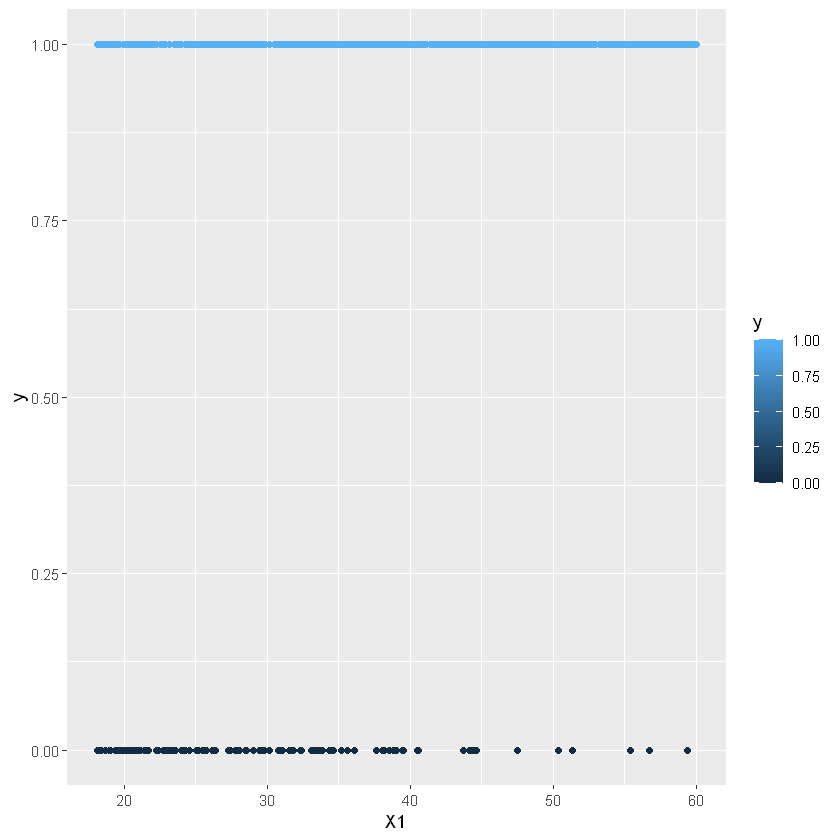

In [7]:
# Explore the data
# Scatterplot of ys on X1
ggplot(data.train, aes(x = X1, y = y, colour = y)) + 
  geom_point()

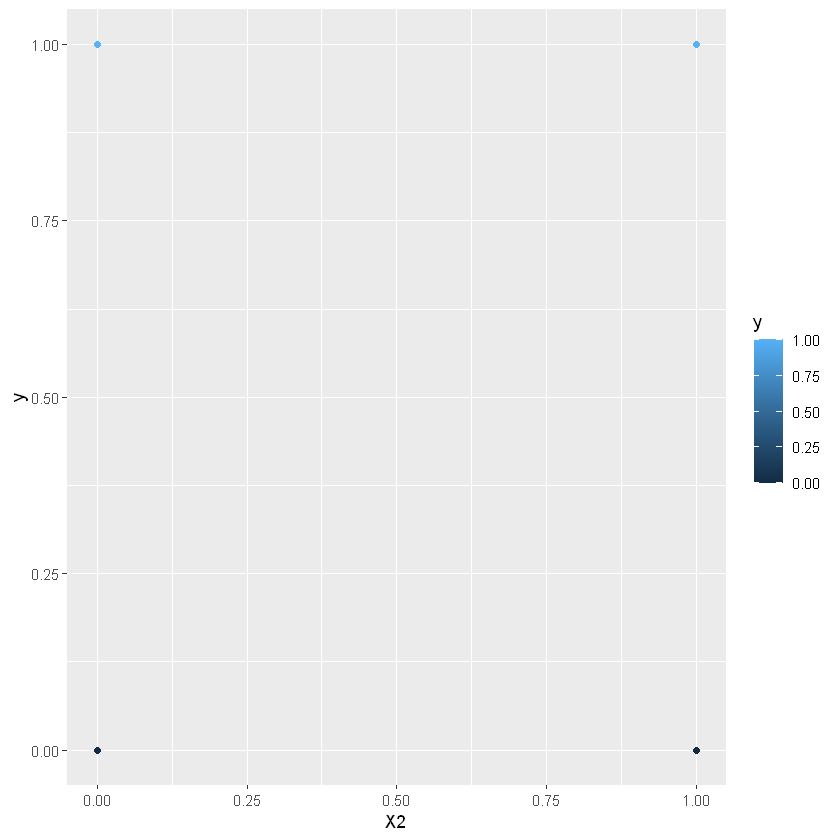

In [8]:
# ... ys on X2
ggplot(data.train, aes(x = X2, y = y, colour = y)) + 
  geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



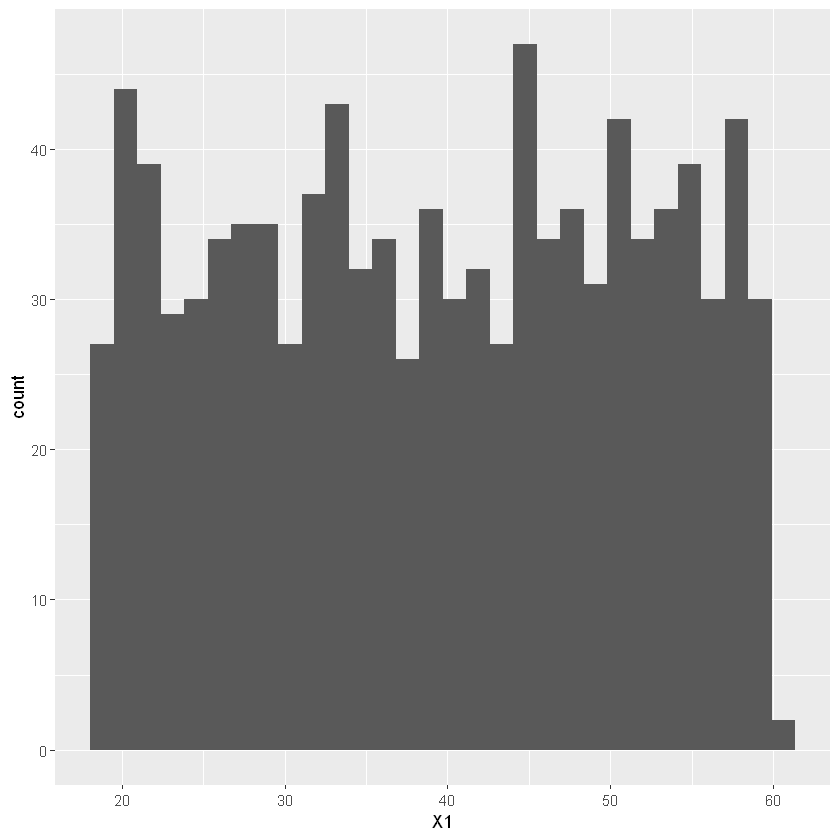

In [9]:
# Distribution of X1
ggplot(data.train, aes(X1)) + 
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



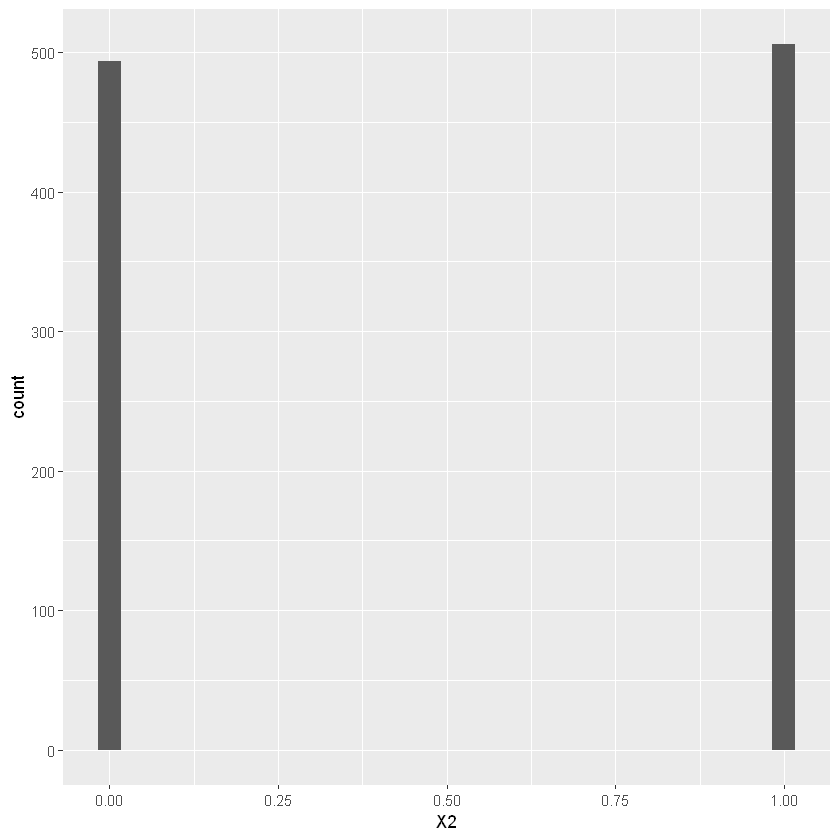

In [10]:
# Distribution of X2
ggplot(data.train, aes(X2)) + 
  geom_histogram() 


## b) Obtain the estimates


In [11]:
# b)
# Estimate betas via ML (Logistic Regression)
Logit <- glm(y ~ X1 + X2, data = data.train, family = binomial)
summary(Logit)
(beta.logit <- Logit$coefficients)


Call:
glm(formula = y ~ X1 + X2, family = binomial, data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0976   0.1772   0.3003   0.5397   1.2422  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.07714    0.36548  -5.683 1.32e-08 ***
X1           0.10602    0.01104   9.603  < 2e-16 ***
X2           0.85701    0.21156   4.051 5.10e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 765.13  on 999  degrees of freedom
Residual deviance: 622.23  on 997  degrees of freedom
AIC: 628.23

Number of Fisher Scoring iterations: 6


(Intercept)          X1          X2 
 -2.0771396   0.1060217   0.8570086

### Compared with estimates obtained from manually doing ML

$P(Y_{i} = y_{i}) = \pi_{i}^{y_{i}}*(1-\pi_{i})^{1-y_{i}}$  
$$
\begin{aligned}
L &= P(Y_{1} = y_{1},...Y_{n} = y_{n}) = \prod_{i = 1}^{n} \pi_{i}^{y_{i}}*(1-\pi_{i})^{1-y_{i}} \\
logL &= \sum_{i = 1}^{n} y_{i} * \log(\pi_{i}) + (1 - y_{i}) * \log(1 - \pi_{i})\\
\pi_{i} &= \frac{1}{1 + e^{-X\beta}}\\
1 - \pi_{i} &= \frac{1}{1 + e^{X\beta}}\\
logL &= \sum_{i = 1}^{n} y_{i}(-log(1 + e^{-X\beta}) + (1 - y_{i})(-log(1 + e ^ {X\beta}))\\
&= \sum_{i = 1}^{n} -y_{i}(log(1 + e^{-X\beta}) - (1 - y_{i})(log(1 + e ^ {X\beta}))
\end{aligned}
$$

In [51]:
# Compared with manually doing ML

loglike<-function(beta) # the likelihood function for the logit model
{
  ll <- sum(-data.train$y * log(1 + exp(-(X.train %*% beta))) - 
              (1 - data.train$y) * log(1 + exp(X.train %*% beta)))
  return(ll)
}

# Initialize estimation procedure
estim <- maxBFGS(loglike, finalHessian = TRUE, start = c(5, 5, 10)) 
beta.ML <- estim$estimate # give out parameter estimates
beta.ML
(beta.logit <- Logit$coefficients)

[1] -2.0771394  0.1060217  0.8570085

(Intercept)          X1          X2 
 -2.0771396   0.1060217   0.8570086

In [52]:
# Standard Error of the Coefficients
estim.hess <- estim$hessian 
# the optimization routine returns the hessian matrix at the last iteration.
Cov <- -(solve(estim.hess))
# the covariance matrix is the (negative) inverse of the hessian matrix.
sde <- sqrt(diag(Cov))#the standard errors are the square root of the diagonal of the inverse Hessian. 
sde
stdEr(Logit)

[1] 0.36491899 0.01101926 0.21179721

(Intercept)          X1          X2 
 0.36547737  0.01104017  0.21156292

### Prepare some data for plotting later
#### True probabilities and logodds

$P(Y_{i} = 1) = \pi_{i}^{1}*(1-\pi_{i})^{1-1} = \pi_{i} = \frac{1}{1+e^{-x'_{i}\beta}}$  
$\log(\frac{\pi_{i}}{1 - \pi_{i}}) = x'_{i}\beta$

In [12]:
# "True" log odds and probs (never observe in real life)
logodds.true.train <- X.train %*% beta
probs.true.train <- 1 / (1 + exp(-logodds.true.train))

# "True" log odds and probs for test data
logodds.true.test <- X.test %*% beta 
probs.true.test <- 1 / (1 + exp(-logodds.true.test))

heads <- matrix(NA, 6, 4)
items <- list(logodds.true.test, probs.true.test, 
              logodds.true.train, probs.true.train)
for (i in 1:4) {
  heads[, i] <- head(items[[i]])
}
heads


3.4271338,0.9685419,3.6710445,0.9751817
0.2069507,0.5515538,4.4661959,0.9886396
2.9496288,0.9502459,3.6984926,0.9758375
3.3636879,0.9665502,0.2869315,0.5712448
4.4450066,0.9883991,0.6190383,0.6499998
3.8141910,0.9784204,2.7370436,0.9391774


#### Fitted Probabilities and Logodds

$\hat{P}(Y_{i} = 1) = \hat{\pi_{i}} = \frac{1}{1+e^{-x'_{i}\hat{\beta}}}$  
${\log}(\frac{\hat{\pi_{i}}}{1 - \hat{\pi_{i}}}) = x'_{i}\hat{\beta}$

In [13]:
# Construct 95% CI for the estimated probs
# Fit the model again to the data.train
logit.train <- predict(Logit, data.train, se = T)
logodds.fit.train <- logit.train$fit
probs.fit.train <- 1 / (1 + exp(-logodds.fit.train))
lower.train <- logodds.fit.train - 1.96 * logit.train$se.fit # lower bound
upper.train <- logodds.fit.train + 1.96 * logit.train$se.fit # upper bound
lower.train <- 1 / (1 + exp(-lower.train)) 
upper.train <- 1 / (1 + exp(-upper.train))

In [14]:
# Use the estimated betas to fit the test data
logit.test <- predict(Logit, newdata = data.test, se = T)
logodds.fit.test <- logit.test$fit

# Check if it's correct
head(logodds.fit.test)
head(X.test %*% beta.logit)

1         2         3         4         5         6 
3.4735925 0.2627075 2.9673334 3.4063260 4.5527587 3.8839571

3.4735925
0.2627075
2.9673334
3.4063260
4.5527587
3.8839571


In [15]:
# Construct 95% CI for the (test) estimated probs 
lower.test <- logodds.fit.test - 1.96 * logit.test$se.fit # lower bound of log odds
upper.test <- logodds.fit.test + 1.96 * logit.test$se.fit # upper bound...
probs.fit.test <- 1 / (1 + exp(-logodds.fit.test))
lower.test <- 1 / (1 + exp(-lower.test)) 
upper.test <- 1 / (1 + exp(-upper.test))

## MSE, AVE and the Confusion Matrix

In [29]:
# MSE and AVE
y.pred.train <-  c()
y.pred.test <- c()
threshold <- 0.65

for (i in 1:n) {
  if (probs.fit.train[i] >= threshold) {
    y.pred.train[i] <- 1
  }
  else {
    y.pred.train[i] <- 0
  }
  if (probs.fit.test[i] >= threshold) {
    y.pred.test[i] <- 1
  }
  else {
    y.pred.test[i] <- 0
  }
}
# Training error
(MSE <- sum(y.pred.train != data.train$y) / length(data.train$y))

# Testing error
(AVE <- sum(y.pred.test != data.test$y) / length(data.test$y))

[1] 0.132

[1] 0.136

In [25]:
(cfm <- (table(y.pred.train, data.train$y,
                         dnn = c("Predicted", "True"))))
(addmargins(cfm))
addmargins(prop.table(cfm))
addmargins(prop.table(cfm, 2))

         True
Predicted   0   1
        0  40  44
        1  88 828

,0,1,Sum
0,40,44,84
1,88,828,916
Sum,128,872,1000


,0,1,Sum
0,0.040,0.044,0.084
1,0.088,0.828,0.916
Sum,0.128,0.872,1.000


,0,1,Sum
0,0.3125,0.05045872,0.3629587
1,0.6875,0.94954128,1.6370413
Sum,1.0000,1.00000000,2.0000000


In [30]:
(cfm.test <- (table(y.pred.test, data.test$y,
               dnn = c("Predicted", "True"))))
(addmargins(cfm.test))
addmargins(prop.table(cfm.test))
addmargins(prop.table(cfm.test, 2))


         True
Predicted   0   1
        0  38  41
        1  95 826

,0,1,Sum
0,38,41,79
1,95,826,921
Sum,133,867,1000


,0,1,Sum
0,0.038,0.041,0.079
1,0.095,0.826,0.921
Sum,0.133,0.867,1.000


,0,1,Sum
0,0.2857143,0.0472895,0.3330038
1,0.7142857,0.9527105,1.6669962
Sum,1.0000000,1.0000000,2.0000000


In [33]:
0.088 + 0.044
0.095 + 0.041

[1] 0.132

[1] 0.136

## d) VIsualizing the results

### Preparing data frame for plotting

In [36]:
plt.data <- data.frame(X1.train = data.train$X1,
                       X1.test = data.test$X1,
                       X2.train = factor(data.train$X2),
                       X2.test = factor(data.test$X2),
                       y.train = data.train$y,
                       y.test = data.test$y,
                       probs.train = probs.fit.train,
                       probs.test = probs.fit.test,
                       probs.true.train, 
                       probs.true.test,
                       upper.train,
                       lower.train,
                       upper.test,
                       lower.test) 

head(plt.data)  
str(plt.data)

,X1.train,X1.test,X2.train,X2.test,y.train,y.test,probs.train,probs.test,probs.true.train,probs.true.test,upper.train,lower.train,upper.test,lower.test
,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46.71044,44.27134,1,1,1,1,0.9766194,0.9699270,0.9751817,0.9685419,0.9857454,0.9618769,0.9808875,0.9529822
2,54.66196,22.06951,1,0,1,0,0.9898011,0.5653017,0.9886396,0.5515538,0.9946307,0.9807117,0.6421412,0.4851906
3,46.98493,39.49629,1,1,1,1,0.9772748,0.9510763,0.9758375,0.9502459,0.9862113,0.9627650,0.9665386,0.9289941
4,22.86932,43.63688,0,1,1,1,0.5860123,0.9679017,0.5712448,0.9665502,0.6591637,0.5088589,0.9793866,0.9503421
5,26.19038,54.45007,0,1,0,1,0.6681013,0.9895718,0.6499998,0.9883991,0.7267951,0.6036740,0.9944876,0.9803590
6,37.37044,48.14191,1,1,1,1,0.9394569,0.9798453,0.9391774,0.9784204,0.9574119,0.9146074,0.9880192,0.9662850


'data.frame':	1000 obs. of  14 variables:
 $ X1.train        : num  46.7 54.7 47 22.9 26.2 ...
 $ X1.test         : num  44.3 22.1 39.5 43.6 54.5 ...
 $ X2.train        : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 2 1 1 2 ...
 $ X2.test         : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 1 2 2 2 ...
 $ y.train         : int  1 1 1 1 0 1 1 1 1 1 ...
 $ y.test          : int  1 0 1 1 1 1 0 1 1 1 ...
 $ probs.train     : num  0.977 0.99 0.977 0.586 0.668 ...
 $ probs.test      : num  0.97 0.565 0.951 0.968 0.99 ...
 $ probs.true.train: num  0.975 0.989 0.976 0.571 0.65 ...
 $ probs.true.test : num  0.969 0.552 0.95 0.967 0.988 ...
 $ upper.train     : num  0.986 0.995 0.986 0.659 0.727 ...
 $ lower.train     : num  0.962 0.981 0.963 0.509 0.604 ...
 $ upper.test      : num  0.981 0.642 0.967 0.979 0.994 ...
 $ lower.test      : num  0.953 0.485 0.929 0.95 0.98 ...


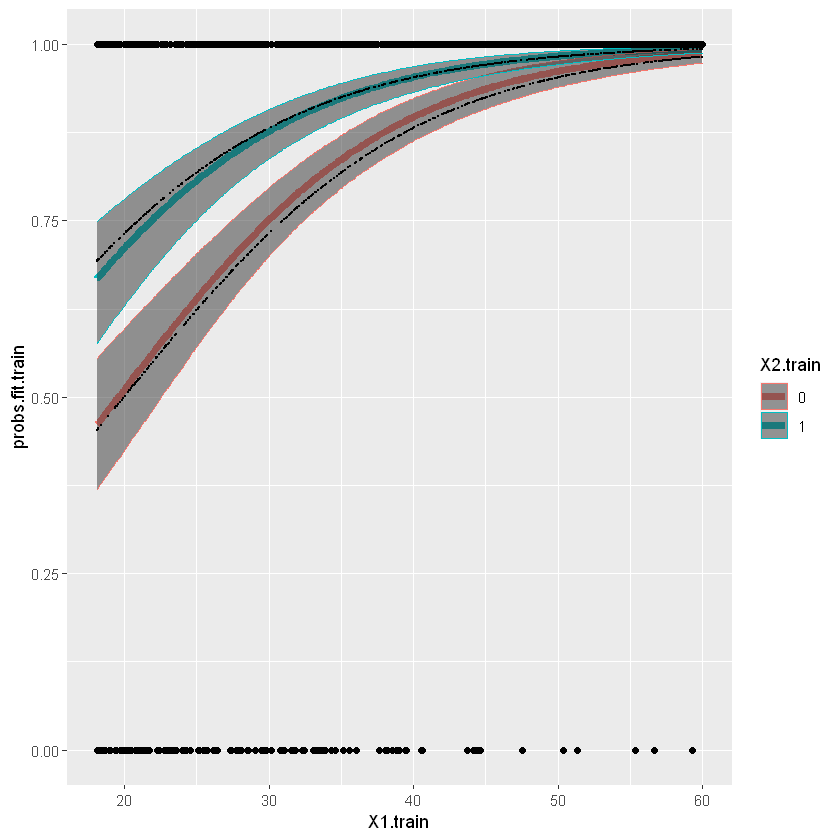

In [42]:
ggplot(plt.data, aes(X1.train)) +
  geom_line(aes(y = probs.fit.train, colour = X2.train), size = 2) + 
  geom_ribbon(aes(ymin = lower.train, 
                  ymax = upper.train, 
                  colour = X2.train), 
              alpha = 0.5) +
  geom_point(aes(y = y.train)) + 
  geom_point(aes(y = probs.true.train), size = 0.1)

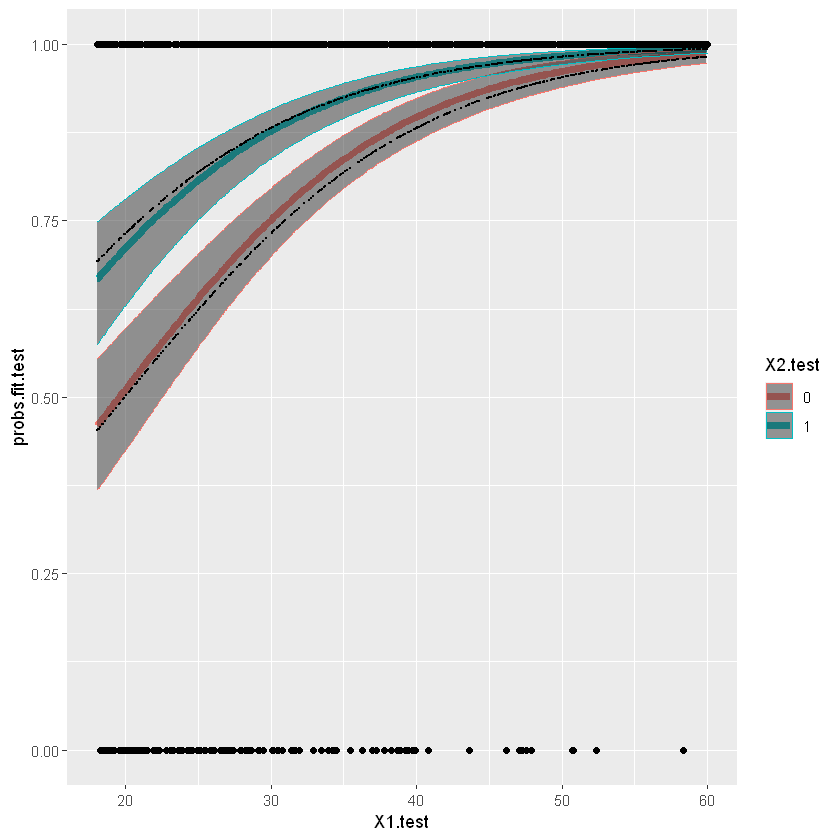

In [43]:
ggplot(plt.data, aes(X1.test)) +
  geom_line(aes(y = probs.fit.test, colour = X2.test), size = 2) + 
  geom_ribbon(aes(ymin = lower.test, ymax = upper.test, colour = X2.test), alpha = 0.5) +
  geom_point(aes(y = y.test)) + 
  geom_point(aes(y = probs.true.test), size = 0.1)